In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
test =pd.read_csv('test.csv')
train =pd.read_csv('train.csv')

In [86]:
test.shape

(1459, 80)

In [87]:
train.shape

(1460, 81)

In [88]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [89]:
target = train.SalePrice

In [90]:
numeric_features = train.select_dtypes(include=[np.number])
corr= numeric_features.corr()

In [91]:
corr['SalePrice'].head()

Id            -0.021917
MSSubClass    -0.084284
LotFrontage    0.351799
LotArea        0.263843
OverallQual    0.790982
Name: SalePrice, dtype: float64

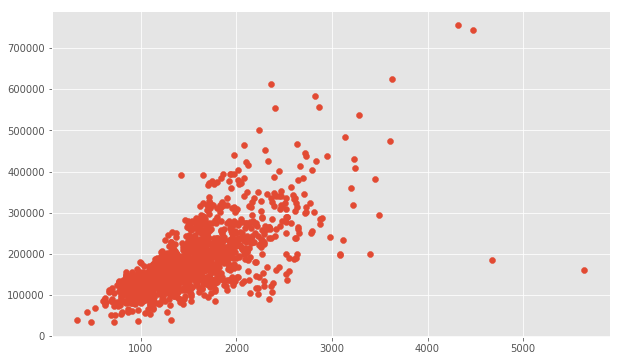

In [92]:
plt.scatter(x=train['GrLivArea'],y=target)

In [93]:
# handle null values and no float values 
nulls =pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns =['Nulls']
nulls.index.name ='Feature'
data =train.select_dtypes(include=[np.number]).interpolate().dropna()

In [94]:
#Define X = data and y = target

y= np.log(train.SalePrice)
X=data.drop(['SalePrice','Id'],axis=1)

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=33)

In [96]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
linreg.score(X_test,y_test)

0.9106467595913196

In [98]:
submission = pd.DataFrame()

In [99]:
submission['Id'] = test.Id
f =test.select_dtypes(include=[np.number]).drop(['Id'],axis=1).interpolate()

In [100]:
predictions = linreg.predict(f)

In [101]:
final_pred =np.exp(predictions) #back to real prices

In [102]:
submission['SalePrice'] =final_pred

In [103]:
submission.head()

,Id,SalePrice
0,1461,118410.771135
1,1462,138272.852980
2,1463,167191.303616
3,1464,194935.163255
4,1465,181760.026515


In [104]:
    submission.to_csv('submission.csv',index=False)